# SALES PREDICTION USING PYTHON

# Reading the dataset

In [3]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Zimm\Desktop\CodSoft\Sales Prediction\advertising.csv"
data = pd.read_csv(file_path)

# Information about the dataaet

In [5]:
# Display the first few rows of the dataset
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Preparation and Cleaning

In [9]:
# Check for missing values
missing_values = data.isnull().sum()

In [11]:
# Display summary statistics
summary_stats = data.describe()



In [13]:
missing_values, summary_stats

(TV           0
 Radio        0
 Newspaper    0
 Sales        0
 dtype: int64,
                TV       Radio   Newspaper       Sales
 count  200.000000  200.000000  200.000000  200.000000
 mean   147.042500   23.264000   30.554000   15.130500
 std     85.854236   14.846809   21.778621    5.283892
 min      0.700000    0.000000    0.300000    1.600000
 25%     74.375000    9.975000   12.750000   11.000000
 50%    149.750000   22.900000   25.750000   16.000000
 75%    218.825000   36.525000   45.100000   19.050000
 max    296.400000   49.600000  114.000000   27.000000)

# Exploratory Data Analysis (EDA)

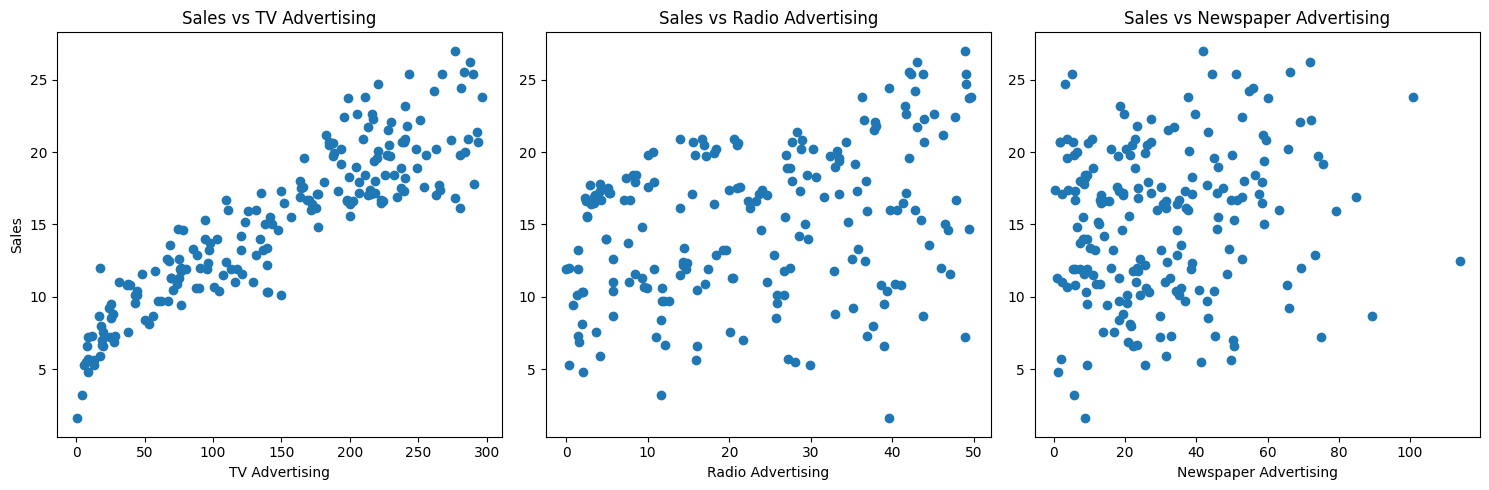

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(data['TV'], data['Sales'])
plt.title('Sales vs TV Advertising')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
plt.scatter(data['Radio'], data['Sales'])
plt.title('Sales vs Radio Advertising')
plt.xlabel('Radio Advertising')

plt.subplot(1, 3, 3)
plt.scatter(data['Newspaper'], data['Sales'])
plt.title('Sales vs Newspaper Advertising')
plt.xlabel('Newspaper Advertising')

plt.tight_layout()
plt.show()

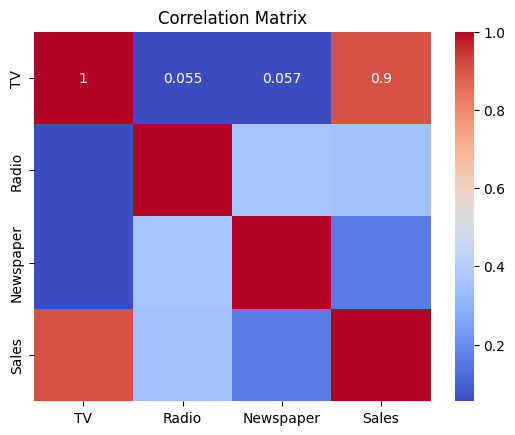

In [17]:

# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the scatter plots, we observe the following relationships:

TV Advertising: There is a clear positive correlation between TV advertising expenditure and sales.
Radio Advertising: There is a positive correlation between radio advertising expenditure and sales, though not as strong as TV.
Newspaper Advertising: The correlation appears weaker compared to TV and radio.
The correlation matrix confirms these observations:

TV and Sales have a high positive correlation.
Radio and Sales have a moderate positive correlation.
Newspaper and Sales have a weaker correlation.

# Total expenditure for each type of advertisement

In [20]:
import pandas as pd

# Calculate the total money spent on each type of advertisement
total_tv = data['TV'].sum()
total_radio = data['Radio'].sum()
total_newspaper = data['Newspaper'].sum()

print(f"Total money spent on TV advertising: ${total_tv}")
print(f"Total money spent on Radio advertising: ${total_radio}")
print(f"Total money spent on Newspaper advertising: ${total_newspaper}")


Total money spent on TV advertising: $29408.5
Total money spent on Radio advertising: $4652.800000000001
Total money spent on Newspaper advertising: $6110.799999999999


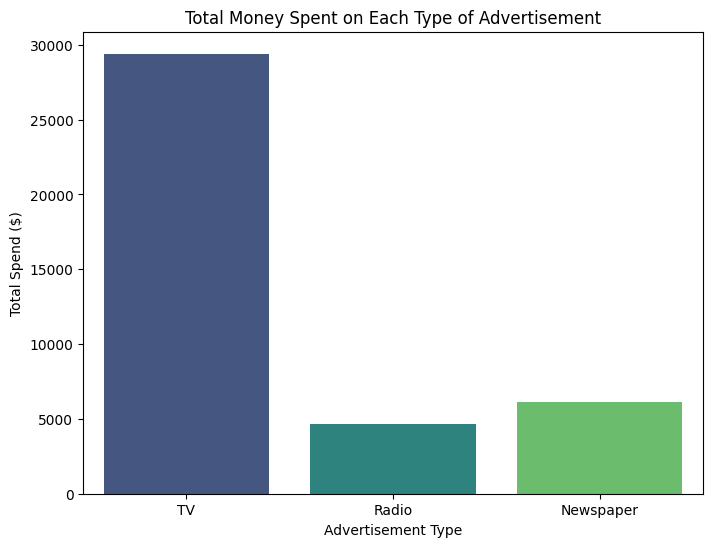

In [24]:
# Calculate the total money spent on each type of advertisement
total_tv = data['TV'].sum()
total_radio = data['Radio'].sum()
total_newspaper = data['Newspaper'].sum()

# Create a DataFrame for the totals
totals = pd.DataFrame({
    'Advertisement Type': ['TV', 'Radio', 'Newspaper'],
    'Total Spend': [total_tv, total_radio, total_newspaper]
})

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Advertisement Type', y='Total Spend', data=totals, palette='viridis')
plt.title('Total Money Spent on Each Type of Advertisement')
plt.xlabel('Advertisement Type')
plt.ylabel('Total Spend ($)')
plt.show()

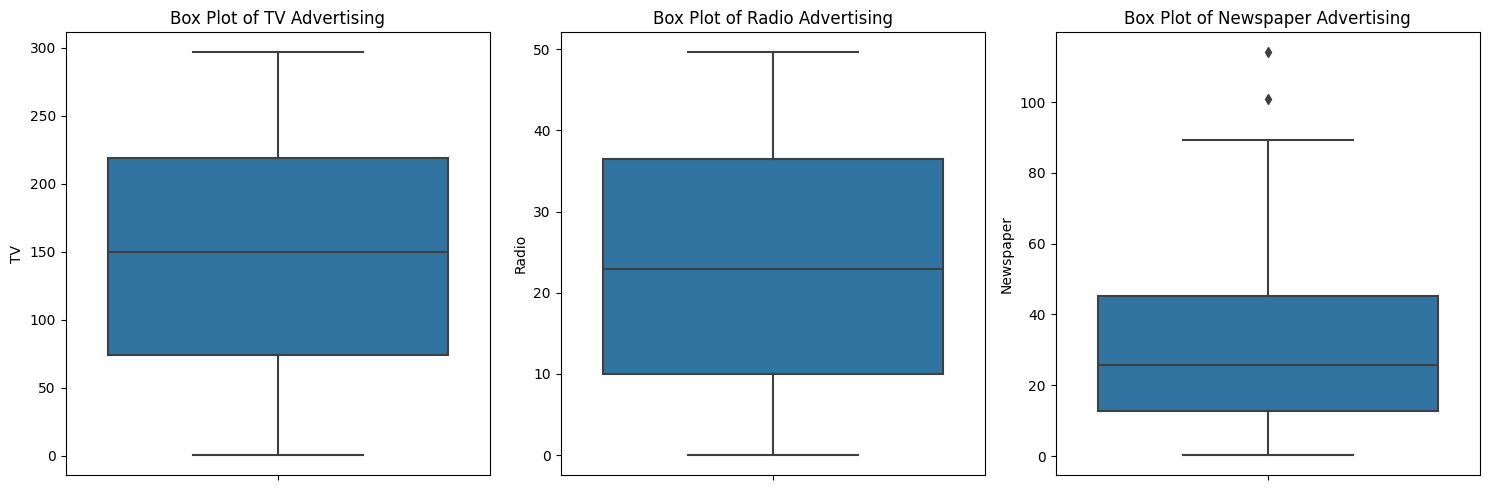

In [26]:
# Create box plots to check for outliers
plt.figure(figsize=(15, 5))

# Box plot for TV advertising
plt.subplot(1, 3, 1)
sns.boxplot(y=data['TV'])
plt.title('Box Plot of TV Advertising')

# Box plot for Radio advertising
plt.subplot(1, 3, 2)
sns.boxplot(y=data['Radio'])
plt.title('Box Plot of Radio Advertising')

# Box plot for Newspaper advertising
plt.subplot(1, 3, 3)
sns.boxplot(y=data['Newspaper'])
plt.title('Box Plot of Newspaper Advertising')

plt.tight_layout()
plt.show()

# Model Training and Evaluation 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target variable
X = data.drop('Sales', axis=1)
y = data['Sales']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [37]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MAE: 1.274826210954934
MSE: 2.907756910271091
R^2: 0.9059011844150826


# Summary and Interpretation:
MAE: Indicates that on average, the model's predictions are off by around 1.25 units. This gives a straightforward measure of prediction accuracy.

MSE: Being larger than MAE, it emphasizes that there might be some larger errors, but overall, these are not too significant given the context.

R²: Suggests that 90% of the variance in sales can be explained by the advertising expenditures on TV, Radio, and Newspaper. This indicates a strong model performance.




# Conclusion:
The evaluation metrics indicate that the model performs well, with the MAE and MSE showing that the prediction errors are relatively small.

The high R² value demonstrates that the model effectively explains a large portion of the variance in sales using the given features.

These metrics provide confidence in the model's predictions and suggest it can be a valuable tool for making informed decisions regarding advertising expenditures to optimize sales.





